In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import glob
from sklearn import linear_model
from sklearn.metrics import r2_score


from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split


import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Apartment Buy

In [3]:
path = os.path.join(os.getcwd(), "Data/Apartment/Buy/")
list_of_files = glob.glob(f"{path}/*.csv") 

In [4]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0,usecols=["city","postcode","numberOfRooms","livingSpace","balcony","builtInKitchen","garden","price","guestToilet"],nrows=1000)
    df=df.sample(frac=1)
    df['price']=df['price'].apply(lambda x: float(x.split(" EUR")[0]))
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [5]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [6]:
hot_zip_test = pd.get_dummies(df_total.postcode)
df_total.balcony = df_total.balcony.astype(int)
df_total.garden = df_total.garden.astype(int)
df_total.builtInKitchen = df_total.builtInKitchen.astype(int)
df_total.guestToilet = df_total.guestToilet.astype(int)

In [7]:
X = pd.concat((df_total[["numberOfRooms","livingSpace","balcony","builtInKitchen","garden","guestToilet"]], hot_zip_test), axis=1)
y = df_total[["price"]]


In [8]:
# a simple linear model doesn't perform too well
simple = linear_model.LinearRegression()
simple.fit(X,y)
y_pred = simple.predict(X)
r2_score(y, y_pred)

0.9080132991552136

In [9]:
# Robustly fit linear model with RANSAC (RANdom SAmple Consensus) algorithm 
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [10]:
regressor.fit(X,y)


RANSACRegressor(base_estimator=LinearRegression())

In [11]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% of apartments identified as outliers' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

17.1% of apartments identified as outliers


In [12]:
y_pred = regressor.predict(X)
df_total["buy_predicted"] = y_pred

In [13]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])


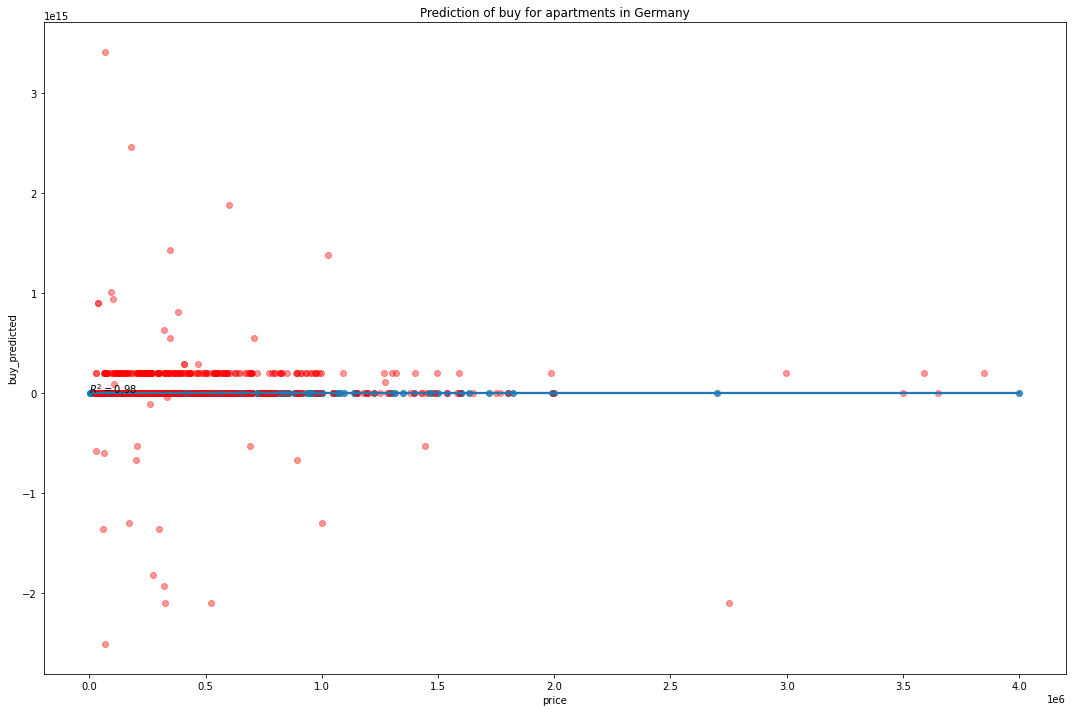

In [14]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.regplot(df_total['price'][inlier_mask],
            df_total['buy_predicted'][inlier_mask])
plt.scatter(df_total['price'][outlier_mask],
            df_total['buy_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of buy for apartments in Germany')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)

## House Buy

In [15]:
path = os.path.join(os.getcwd(), "Data/House/Buy/"")
list_of_files = glob.glob(f"{path}/*.csv") 

In [16]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0,usecols=["city","postcode","numberOfRooms","livingSpace","price","guestToilet"],nrows=1000)
    df=df.sample(frac=1)
    df['price']=df['price'].apply(lambda x: float(x.split(" EUR")[0]))
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [17]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [18]:
hot_zip_test = pd.get_dummies(df_total.postcode)
df_total.guestToilet = df_total.guestToilet.astype(int)

In [19]:
X = pd.concat((df_total[["numberOfRooms","livingSpace","guestToilet"]], hot_zip_test), axis=1)
y = df_total[["price"]]


In [20]:
# a simple linear model doesn't perform too well
simple = linear_model.LinearRegression()
simple.fit(X,y)
y_pred = simple.predict(X)
r2_score(y, y_pred)

0.946061964138664

In [21]:
# Robustly fit linear model with RANSAC (RANdom SAmple Consensus) algorithm 
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [22]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression())

In [23]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% of houses identified as outliers' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

17.3% of houses identified as outliers


In [24]:
y_pred = regressor.predict(X)
df_total["buy_predicted"] = y

In [25]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

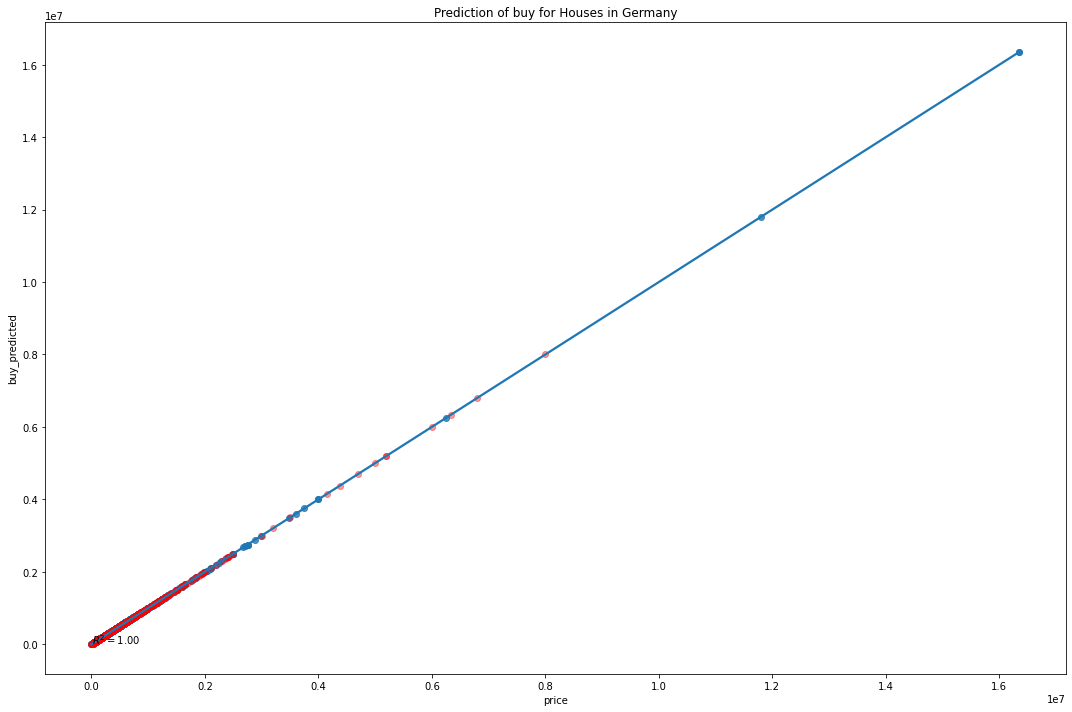

In [26]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.regplot(df_total['price'][inlier_mask],
            df_total['buy_predicted'][inlier_mask])
plt.scatter(df_total['price'][outlier_mask],
            df_total['buy_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of buy for Houses in Germany')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)

## Apartment Rent

In [27]:
path = os.path.join(os.getcwd(), "Data/Apartment/rent/")
list_of_files = glob.glob(f"{path}/*.csv") 

In [28]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0,usecols=["city","postcode","numberOfRooms","livingSpace","balcony","builtInKitchen","garden","price"],nrows=1000)
    df=df.sample(frac=1)
    df['price']=df['price'].apply(lambda x: float(x.split(" EUR")[0]))
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [29]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [30]:
hot_zip_test = pd.get_dummies(df_total.postcode)
df_total.balcony = df_total.balcony.astype(int)
df_total.garden = df_total.garden.astype(int)
df_total.builtInKitchen = df_total.builtInKitchen.astype(int)

In [31]:
X = pd.concat((df_total[["numberOfRooms","livingSpace","balcony","builtInKitchen","garden"]], hot_zip_test), axis=1)
y = df_total[["price"]]


In [32]:
# a simple linear model doesn't perform too well
simple = linear_model.LinearRegression()
simple.fit(X,y)
y_pred = simple.predict(X)
r2_score(y, y_pred)

0.9999173737384454

In [33]:
# Robustly fit linear model with RANSAC (RANdom SAmple Consensus) algorithm 
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [34]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression())

In [35]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% of apartments identified as outliers' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

16.3% of apartments identified as outliers


In [36]:
y_pred = regressor.predict(X)
df_total["rent_predicted"] = y

In [37]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

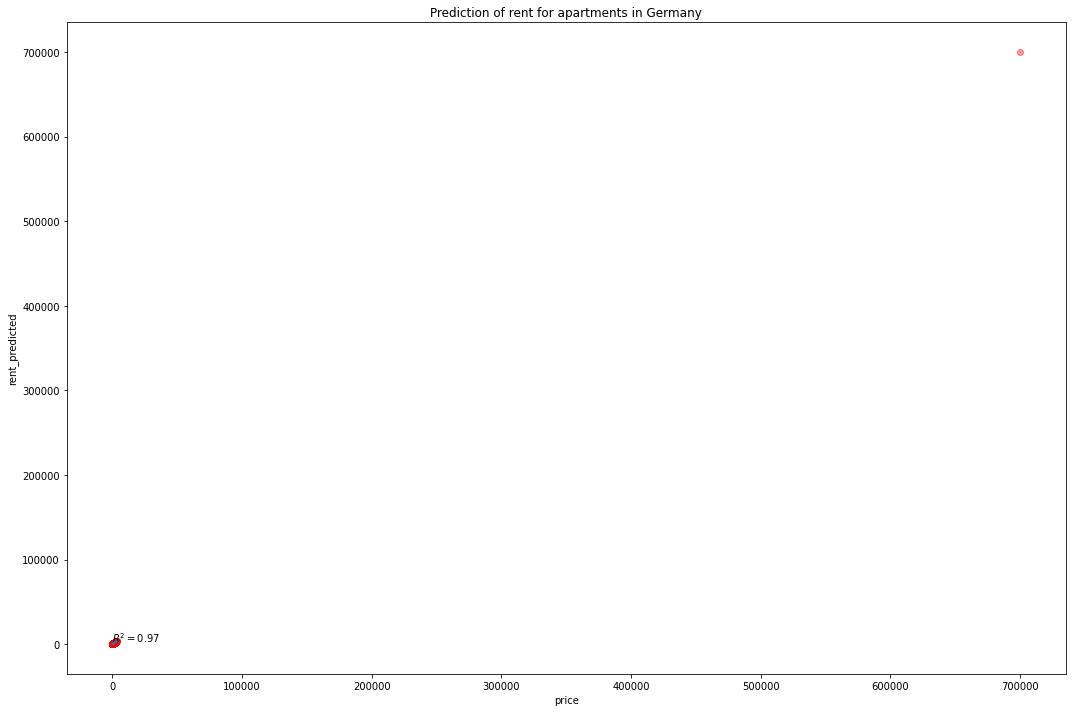

In [38]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.regplot(df_total['price'][inlier_mask],
            df_total['rent_predicted'][inlier_mask])
plt.scatter(df_total['price'][outlier_mask],
            df_total['rent_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of rent for apartments in Germany')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)

## House Buy

In [39]:
path = os.path.join(os.getcwd(), "Data/House/Rent/")
list_of_files = glob.glob(f"{path}/*.csv") 

In [40]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0,usecols=["city","postcode","numberOfRooms","livingSpace","price"],nrows=1000)
    df=df.sample(frac=1)
    df['price']=df['price'].apply(lambda x: float(x.split(" EUR")[0]))
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [41]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [42]:
hot_zip_test = pd.get_dummies(df_total.postcode)

In [43]:
X = pd.concat((df_total[["numberOfRooms","livingSpace"]], hot_zip_test), axis=1)
y = df_total[["price"]]


In [44]:
# a simple linear model doesn't perform too well
simple = linear_model.LinearRegression()
simple.fit(X,y)
y_pred = simple.predict(X)
r2_score(y, y_pred)

0.544862826255055

In [45]:
# Robustly fit linear model with RANSAC (RANdom SAmple Consensus) algorithm 
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [46]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression())

In [47]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% of apartments identified as outliers' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

16.3% of apartments identified as outliers


In [48]:
y_pred = regressor.predict(X)
df_total["rent_predicted"] = y

In [49]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

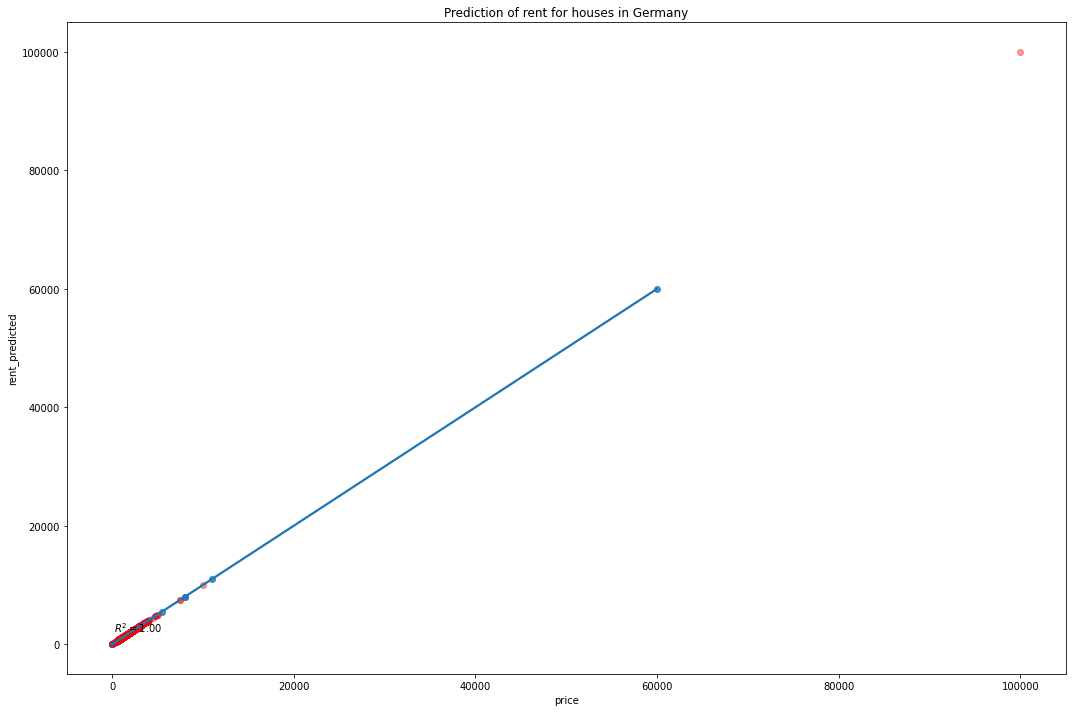

In [50]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.regplot(df_total['price'][inlier_mask],
            df_total['rent_predicted'][inlier_mask])
plt.scatter(df_total['price'][outlier_mask],
            df_total['rent_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of rent for houses in Germany')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)